In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import math
import datetime
import seaborn as sns
%matplotlib inline

# 匯入資料並選取時間大小(Size=1H)
### 期貨

In [2]:
datapath1=r'C:\Users\User\Desktop\程式交易\日盛\日盛實習\數據\期貨資料'
namelist1=['CF_1M_Front.txt','XX_1M_FrontExpi.txt','DA_1M_MostActive.txt']
size='1H'

for i in namelist1:
    data = pd.read_csv(datapath1+ '\\' +i,sep = ',',engine='python',encoding = 'utf-8')
    data['Date']=data['Date']+' '+data['Time']
    data=data.drop('Time',axis=1)
    data['Date']=pd.to_datetime(data['Date'])
    data.set_index('Date' , inplace=True)
    
    data_open=data.loc[:,'Open'].resample(size).first().dropna()
    data_high=data.loc[:,'High'].resample(size).max().dropna()
    data_low=data.loc[:,'Low'].resample(size).min().dropna()
    data_close=data.loc[:,'Close'].resample(size).last().dropna()
    data_volumn=data.loc[:,'Volume'].resample(size).sum().dropna()
    locals()[i[:i.index('_')]+'_data']=pd.concat([data_open,data_high,data_close,data_low,data_volumn],axis=1).dropna()

### 現貨

In [3]:
datapath2=r'C:\Users\User\Desktop\程式交易\日盛\日盛實習\數據\現貨資料'
namelist2=['CFn_1M.csv','DAn_1M.csv','XXn_1M.csv']
for i in namelist2:
    data = pd.read_csv(datapath2+ '\\' +i,sep = ',',engine='python',encoding = 'utf-8')
    data['Date']=data['Date']+' '+data['Time']
    data=data.drop('Time',axis=1)
    data['Date']=pd.to_datetime(data['Date'])
    data.set_index('Date' , inplace=True)
    
    data_open=data.loc[:,'Open'].resample(size).first().dropna()
    data_high=data.loc[:,'High'].resample(size).max().dropna()
    data_low=data.loc[:,'Low'].resample(size).min().dropna()
    data_close=data.loc[:,'Close'].resample(size).last().dropna()
    locals()[i[:i.index('_')]+'_data']=pd.concat([data_open,data_high,data_close,data_low],axis=1).dropna()

# 印出六個商品的交易時間

In [4]:
testnamelist=['XX','CF','DA','XXn','CFn','DAn']
for k in testnamelist:
    print (k,'=',locals()[k+'_data'].index[0],'~',locals()[k+'_data'].index[-1])

XX = 1998-07-01 10:00:00 ~ 2019-04-01 22:00:00
CF = 2000-05-02 08:00:00 ~ 2019-07-17 22:00:00
DA = 1997-04-01 08:00:00 ~ 2019-07-17 22:00:00
XXn = 2003-07-01 09:00:00 ~ 2019-07-26 17:00:00
CFn = 2003-07-01 09:00:00 ~ 2019-07-26 17:00:00
DAn = 2003-07-01 09:00:00 ~ 2019-07-26 17:00:00


根據以上個個商品的時間，找出共同交易時間為09:00-17:00

# 篩選正確的時間出來 (2016/1/1-2019/4/1  0900-1700)
### 期貨

In [101]:
startDay='2018/1/1'
endDay='2019/4/1'

#Euro Stoxx 50
newxx_data=XX_data
newxx_data=newxx_data[startDay:endDay]
newxx_data=newxx_data.reset_index()
#newxx_data=newxx_data[newxx_data['Date'].dt.hour >= 9]
#newxx_data=newxx_data[newxx_data['Date'].dt.hour <=16]
newxx_data.set_index('Date' , inplace=True)

#Cac
newcac_data=CF_data
newcac_data=newcac_data[startDay:endDay]
newcac_data=newcac_data.reset_index()
#newcac_data=newcac_data[newcac_data['Date'].dt.hour >= 9]
#newcac_data=newcac_data[newcac_data['Date'].dt.hour <=16]
newcac_data.set_index('Date' , inplace=True)

#Dax
newdax_data=DA_data
newdax_data=newdax_data[startDay:endDay]
newdax_data=newdax_data.reset_index()
#newdax_data=newdax_data[newdax_data['Date'].dt.hour >= 9]
#newdax_data=newdax_data[newdax_data['Date'].dt.hour <=16]
newdax_data.set_index('Date' , inplace=True)



In [102]:
newdax_data['2018/3/15':'2018/3/15']

,Open,High,Close,Low,Volume
Date,,,,,
2018-03-15 08:00:00,12266.0,12301.0,12280.5,12264.5,2671
2018-03-15 09:00:00,12280.0,12299.0,12292.5,12271.5,7066
2018-03-15 10:00:00,12292.0,12351.5,12309.5,12285.0,8504
2018-03-15 11:00:00,12309.0,12310.5,12246.0,12243.0,8669
2018-03-15 12:00:00,12245.5,12287.5,12276.5,12237.5,5197
2018-03-15 13:00:00,12277.0,12293.5,12284.5,12249.5,4193
2018-03-15 14:00:00,12285.5,12304.5,12293.0,12279.0,5531
2018-03-15 15:00:00,12294.0,12341.5,12336.0,12293.5,7887
2018-03-15 16:00:00,12334.5,12380.0,12345.5,12330.5,8925


### 現貨

In [103]:
#Euro Stoxx 50
newxxn_data=XXn_data
newxxn_data=newxxn_data[startDay:endDay]
newxxn_data=newxxn_data.reset_index()
newxxn_data=newxxn_data[newxxn_data['Date'].dt.hour >= 9]
newxxn_data=newxxn_data[newxxn_data['Date'].dt.hour <=16]
newxxn_data.set_index('Date' , inplace=True)

#Cac
newcacn_data=CFn_data
newcacn_data=newcacn_data[startDay:endDay]
newcacn_data=newcacn_data.reset_index()
newcacn_data=newcacn_data[newcacn_data['Date'].dt.hour >= 9]
newcacn_data=newcacn_data[newcacn_data['Date'].dt.hour <=16]
newcacn_data.set_index('Date' , inplace=True)

#Dax
newdaxn_data=DAn_data
newdaxn_data=newdaxn_data[startDay:endDay]
newdaxn_data=newdaxn_data.reset_index()
newdaxn_data=newdaxn_data[newdaxn_data['Date'].dt.hour >= 9]
newdaxn_data=newdaxn_data[newdaxn_data['Date'].dt.hour <=16]
newdaxn_data.set_index('Date' , inplace=True)

# 除權息
## Dax 除息

In [104]:
#資本利得稅與股利所得稅差額
dividendTax19=0.05825
dividendTax18=0
dividendTax17=0.1055
dividendTax16=0.1055

# 2019
baseValue_dax19=newdaxn_data['2019/3/12':'2019/3/14']['Close'].mean()
dividendRatio_dax19={'2019/3/28':0.00275,'2019/4/8':0.00064,'2019/4/14':0.00036,'2019/4/17':0.00014,'2019/4/28':0.00337,'2019/5/1':0.00106,'2019/5/5':0.00279,'2019/5/7':0.00031,'2019/5/8':0.00357, '2019/5/9':0.00086, '2019/5/14':0.00279, '2019/5/15':0.00269, '2019/5/16':0.00305, '2019/5/19':0.00037,'2019/5/22':0.00288, '2019/5/23':0.00019, '2019/6/18':0.00002 }
ex_dividendDay_dax19=['2019/3/28','2019/4/8','2019/4/14','2019/4/17','2019/4/28','2019/5/1','2019/5/5','2019/5/7','2019/5/8', '2019/5/9', '2019/5/14', '2019/5/15', '2019/5/16', '2019/5/19','2019/5/22', '2019/5/23', '2019/6/18']

for i in ex_dividendDay_dax19:
    newdaxn_data['2019/3/15':i]['Close']=newdaxn_data['2019/3/18':i]['Close']+dividendTax19*baseValue_dax19*dividendRatio_dax19[i]

# 2018
baseValue_dax18=newdaxn_data['2018/3/13':'2018/3/15']['Close'].mean()
dividendRatio_dax18={'2018/4/5':0.003104969,'2018/4/9':0.000584875,'2018/4/24':0.001123418,'2018/4/25':0.001199442,'2018/4/26':0.000723693,'2018/4/29':0.001144128,'2018/5/3':0.002139714,'2018/5/6':0.002256173,'2018/5/8':0.000299681,'2018/5/9':0.00451846,'2018/5/16':0.000726075,'2018/5/17':0.005880565,'2018/5/20':0.000330973,'2018/5/24':0.000180325,'2018/5/27':0.001837523}
ex_dividendDay_dax18=['2018/4/5','2018/4/9','2018/4/24','2018/4/25','2018/4/26','2018/4/29','2018/5/3','2018/5/6','2018/5/8','2018/5/9','2018/5/16','2018/5/17','2018/5/20','2018/5/24','2018/5/27']

for i in ex_dividendDay_dax18:
    newdaxn_data['2018/3/16':i]['Close']=newdaxn_data['2018/3/16':i]['Close']+dividendTax18*baseValue_dax18*dividendRatio_dax18[i]
    
# 2017
baseValue_dax17=newdaxn_data['2017/3/14':'2017/3/16']['Close'].mean()
dividendRatio_dax17={'2017/3/29':0.002768388,'2017/4/6':0.000512024,'2017/4/20':0.000140271,'2017/4/26':0.001099518,'2017/4/27':0.000062460,'2017/4/28':0.001776216,'2017/5/1':0.00212647,'2017/5/3':0.002771097,'2017/5/7':0.000186535,'2017/5/10':0.00319184,'2017/5/11':0.002220931,'2017/5/14':0.002820239,'2017/5/16':0.000415264,'2017/5/17':0.000344935,'2017/5/18':0.000208063,'2017/5/31':0.00223757}
ex_dividendDay17_dax=['2017/3/29','2017/4/6','2017/4/20','2017/4/26','2017/4/27','2017/4/28','2017/5/1','2017/5/3','2017/5/7','2017/5/10','2017/5/11','2017/5/14','2017/5/16','2017/5/17','2017/5/18','2017/5/31']

for i in ex_dividendDay17_dax:
    newdaxn_data['2017/3/17':i]['Close']=newdaxn_data['2017/3/17':i]['Close']+dividendTax17*baseValue_dax17*dividendRatio_dax17[i]

#2016
baseValue_dax16=newdaxn_data['2016/3/15':'2016/3/17']['Close'].mean()
dividendRatio_dax16={'2016/4/1':0.000166037,'2016/4/7':0.003273368,'2016/4/12':0.000553345,'2016/4/21':0.000235211,'2016/4/28':0.001303035,'2016/4/29':0.000218871,'2016/5/2':0.005588397,'2016/5/4':0.000604923,'2016/5/5':0.003372076,'2016/5/12':0.000614255,'2016/5/13':0.004237976,'2016/5/17':0.000225681,'2016/5/19':0.000970158,'2016/6/9':0.000939963}
ex_dividendDay_dax16=['2016/4/1','2016/4/7','2016/4/12','2016/4/21','2016/4/28','2016/4/29','2016/5/2','2016/5/4','2016/5/5','2016/5/12','2016/5/13','2016/5/17','2016/5/19','2016/6/9']
for i in ex_dividendDay_dax16:
    newdaxn_data['2016/3/18':i]['Close']=newdaxn_data['2016/3/18':i]['Close']+dividendTax16*baseValue_dax16*dividendRatio_dax16[i]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Cac 除息

In [105]:
# Year 2019
baseValue_cac19=newcacn_data['2019/3/13':'2019/3/15']['Close'].mean()
dividendRatio_cac19={'2019/3/18':0.004684525,'2019/3/26':0.000450894,'2019/4/14':0.000774732,'2019/4/15':0.000395054}
ex_dividendDay_cac19=['2019/3/26','2019/4/14','2019/4/15']

for i in ex_dividendDay_cac19:
    newcacn_data['2019/3/18':i]['Close']=newcacn_data['2019/3/18':i]['Close']-baseValue_cac19*dividendRatio_cac19[i]

# Year 2018
baseValue_cac183=newcacn_data['2018/3/14':'2018/3/16']['Close'].mean()
dividendRatio_cac183={'2018/3/26':0.000675748,'2018/4/15':0.000729041,'2018/4/16':0.001584229,'2018/4/19':0.00032578}
ex_dividendDay_cac183=['2018/3/26','2018/4/15','2018/4/16','2018/4/19']

for i in ex_dividendDay_cac183:
    newcacn_data['2018/3/19':i]['Close']=newcacn_data['2018/3/19':i]['Close']-baseValue_cac183*dividendRatio_cac183[i]
    
baseValue_cac184=newcacn_data['2018/4/18':'2018/4/20']['Close'].mean()
dividendRatio_cac184={'2018/4/23':0.000908497,'2018/4/24':0.001249449,'2018/4/25':0.000210023,'2018/5/1':0.001424293,'2018/5/2':0.001914829,'2018/5/3':0.000714255,'2018/5/10':0.003325973,'2018/5/13':0.000771069,'2018/5/16':0.00006401,'2018/5/20':0.000276366}
ex_dividendDay_cac184=['2018/4/23','2018/4/24','2018/4/25','2018/5/1','2018/5/2','2018/5/3','2018/5/10','2018/5/13','2018/5/16','2018/5/20']

for i in ex_dividendDay_cac184:
    newcacn_data['2018/4/23':i]['Close']=newcacn_data['2018/4/23':i]['Close']-baseValue_cac184*dividendRatio_cac184[i]

baseValue_cac185=newcacn_data['2018/5/16':'2018/5/18']['Close'].mean()
dividendRatio_cac185={'2018/5/26':0.00071171,'2018/5/27':0.000444693,'2018/5/28':0.003477775,'2018/5/29':0.00007938,'2018/5/30':0.000210957,'2018/6/2':0.000367433,'2018/6/3':0.001083113,'2018/6/4':0.00028921,'2018/6/9':0.004647577}
ex_dividendDay_cac185=['2018/5/26','2018/5/27','2018/5/28','2018/5/29','2018/5/30','2018/6/2','2018/6/3','2018/6/4','2018/6/9']

for i in ex_dividendDay_cac185:
    newcacn_data['2018/5/21':i]['Close']=newcacn_data['2018/5/21':i]['Close']-baseValue_cac185*dividendRatio_cac185[i]

# Year 2017
baseValue_cac173=newcacn_data['2017/3/15':'2017/3/17']['Close'].mean()
dividendRatio_cac173={'2017/3/19':0.004493551,'2017/3/26':0.000679338,'2017/4/17':0.000698071,'2017/4/18':0.001355653,'2017/4/23':0.000300914}
ex_dividendDay_cac173=['2017/3/19','2017/3/26','2017/4/17','2017/4/18','2017/4/23']

for i in ex_dividendDay_cac173:
    newcacn_data['2017/3/20':i]['Close']=newcacn_data['2017/3/20':i]['Close']-baseValue_cac173*dividendRatio_cac173[i]
    
baseValue_cac174=newcacn_data['2017/4/19':'2017/4/21']['Close'].mean()
dividendRatio_cac174={'2017/4/24':0.000828009,'2017/4/27':0.001239437,'2017/5/1':0.0003438,'2017/5/2':0.00076767,'2017/5/4':0.002623763,'2017/5/7':0.001603757,'2017/5/11':0.00044383,'2017/5/14':0.000962254,'2017/5/15':0.004115807,'2017/5/16':0.000218857}
ex_dividendDay_cac174=['2017/4/24','2017/4/27','2017/5/1','2017/5/2','2017/5/4','2017/5/7','2017/5/11','2017/5/14','2017/5/15','2017/5/16']

for i in ex_dividendDay_cac174:
    newcacn_data['2017/4/24':i]['Close']=newcacn_data['2017/4/24':i]['Close']-baseValue_cac174*dividendRatio_cac174[i]

baseValue_cac175=newcacn_data['2017/5/17':'2017/5/19']['Close'].mean()
dividendRatio_cac175={'2017/5/23':0.001053533,'2017/5/25':0.000112502,'2017/5/28':0.001140158,'2017/5/29':0.002729006,'2017/5/30':0.001186732,'2017/6/1':0.000211686,'2017/6/4':0.004079016,'2017/6/5':0.000279748,'2017/6/11':0.001533023}

ex_dividendDay_cac175=['2017/5/23','2017/5/25','2017/5/28','2017/5/29','2017/5/30','2017/6/1','2017/6/4','2017/6/5','2017/6/11']

for i in ex_dividendDay_cac175:
    newcacn_data['2017/5/22':i]['Close']=newcacn_data['2017/5/23':i]['Close']-baseValue_cac175*dividendRatio_cac175[i]
    
# Year 2016
baseValue_cac163=newcacn_data['2016/3/16':'2016/3/18']['Close'].mean()
dividendRatio_cac163={'2016/3/22':0.000800597}
ex_dividendDay_cac163=['2016/3/22']

for i in ex_dividendDay_cac163:
    newcacn_data['2016/3/21':i]['Close']=newcacn_data['2016/3/21':i]['Close']-baseValue_cac163*dividendRatio_cac163[i]
    
baseValue_cac164=newcacn_data['2016/4/13':'2016/4/15']['Close'].mean()
dividendRatio_cac164={'2016/4/18':0.001499707,'2016/4/21':0.000445191,'2016/4/25':0.003645054,'2016/4/26':0.000197828,'2016/4/28':0.001454375,'2016/5/1':0.001186857,'2016/5/3':0.000420792,'2016/5/4':0.003844724,'2016/5/5':0.002225111,'2016/5/8':0.000198309,'2016/5/9':0.003140994,'2016/5/12':0.000882313,'2016/5/16':0.001390746}
ex_dividendDay_cac164=['2016/4/18','2016/4/21','2016/4/25','2016/4/26','2016/4/28','2016/5/1','2016/5/3','2016/5/4','2016/5/5','2016/5/8','2016/5/9','2016/5/12','2016/5/16']

for i in ex_dividendDay_cac164:
    newcacn_data['2016/4/18':i]['Close']=newcacn_data['2016/4/18':i]['Close']-baseValue_cac164*dividendRatio_cac164[i]

baseValue_cac165=newcacn_data['2016/5/18':'2016/5/20']['Close'].mean()
dividendRatio_cac165={'2016/5/24':0.00134564,'2016/5/26':0.001319228,'2016/5/29':0.000339273,'2016/5/30':0.000244668,'2016/6/1':0.002398584,'2016/6/2':0.000297228,'2016/6/5':0.005618321}

ex_dividendDay_cac165=['2016/5/24','2016/5/26','2016/5/29','2016/5/30','2016/6/1','2016/6/2','2016/6/5']

for i in ex_dividendDay_cac165:
    newcacn_data['2016/5/23':i]['Close']=newcacn_data['2016/5/23':i]['Close']-baseValue_cac165*dividendRatio_cac165[i]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

## SX5E 除息

In [106]:
# Year 2019
baseValue_xx19=newxxn_data['2019/3/13':'2019/3/15']['Close'].mean()
dividendRatio_xx19={'2019/3/18':0.002493733,'2019/3/26':0.000482472,'2019/3/28':0.001072533,'2019/4/7':0.000538505,'2019/4/11':0.000267677,'2019/4/14':0.000413822,'2019/4/15':0.000211245,'2019/4/24':0.001833924,'2019/4/25':0.000986098,'2019/4/28':0.002936514,'2019/4/29':0.000839969,'2019/5/1':0.002899565,'2019/5/5':0.000945249,'2019/5/6':0.001603475,'2019/5/8':0.002469722,'2019/5/9':0.000216379,'2019/5/11':0.000254322,'2019/5/14':0.000788112,'2019/5/15':0.001052604,'2019/5/16':0.00083953,'2019/5/19':0.002599675,'2019/5/20':0.001166711,'2019/5/21':0.000364133,'2019/5/22':0.001119736,'2019/5/26':0.00083039,'2019/5/28':0.001219294,'2019/6/3':0.000601521,'2019/6/17':0.000670915}
ex_dividendDay_xx19={'2019/3/18','2019/3/26','2019/3/28','2019/4/7','2019/4/11','2019/4/14','2019/4/15','2019/4/24','2019/4/25','2019/4/28','2019/4/29','2019/5/1','2019/5/5','2019/5/6','2019/5/8','2019/5/9','2019/5/11','2019/5/14','2019/5/15','2019/5/16','2019/5/19','2019/5/20','2019/5/21','2019/5/22','2019/5/26','2019/5/28','2019/6/3','2019/6/17'}

for i in ex_dividendDay_xx19:
    newxxn_data['2019/3/18':i]['Close']=newxxn_data['2019/3/18':i]['Close']-baseValue_xx19*dividendRatio_xx19[i]

# Year 2018
baseValue_xx18=newxxn_data['2018/3/14':'2018/3/16']['Close'].mean()
dividendRatio_xx18={'2018/3/26':0.000363016,'2018/4/5':0.001317276,'2018/4/12':0.000264403,'2018/4/15':0.000391083,'2018/4/16':0.000853338,'2018/4/19':0.0001748,'2018/4/23':0.000488161,'2018/4/24':0.002022893,'2018/4/25':0.000562228,'2018/4/26':0.002185093,'2018/4/29':0.002759559,'2018/5/1':0.000394784,'2018/5/2':0.002447396,'2018/5/3':0.001048565,'2018/5/6':0.001210551,'2018/5/9':0.001594677,'2018/5/10':0.001279045,'2018/5/17':0.00238464,'2018/5/20':0.002269147,'2018/5/21':0.000573817,'2018/5/24':0.0000765,'2018/5/27':0.001161797,'2018/5/28':0.000238955,'2018/5/29':0.001868665,'2018/5/30':0.000360167,'2018/6/4':0.000582009,'2018/6/10':0.000780931,'2018/6/12':0.000699087}
ex_dividendDay_xx18=['2018/3/26','2018/4/5','2018/4/12','2018/4/15','2018/4/16','2018/4/19','2018/4/23','2018/4/24','2018/4/25','2018/4/26','2018/4/29','2018/5/1','2018/5/2','2018/5/3','2018/5/6','2018/5/9','2018/5/10','2018/5/17','2018/5/20','2018/5/21','2018/5/24','2018/5/27','2018/5/28','2018/5/29','2018/5/30','2018/6/4','2018/6/10','2018/6/12']

for i in ex_dividendDay_xx18:
    newxxn_data['2018/3/19':i]['Close']=newxxn_data['2018/3/19':i]['Close']-baseValue_xx18*dividendRatio_xx18[i]
    

# Year 2017
baseValue_xx17=newxxn_data['2017/3/13':'2017/3/17']['Close'].mean()
dividendRatio_xx17={'2017/3/26':0.000341745,'2017/3/29':0.001170308,'2017/4/2':0.000286871,'2017/4/17':0.00059618,'2017/4/18':0.000683632,'2017/4/23':0.000980025,'2017/4/24':0.000417704,'2017/4/26':0.002022354,'2017/4/27':0.000802867,'2017/4/30':0.000750877,'2017/5/1':0.00332039,'2017/5/3':0.002467595,'2017/5/4':0.00132422,'2017/5/7':0.000399477,'2017/5/9':0.000862871,'2017/5/10':0.001012177,'2017/5/11':0.000839925,'2017/5/14':0.001635125,'2017/5/15':0.00211016,'2017/5/16':0.000110494,'2017/5/21':0.001004807,'2017/5/23':0.000334433,'2017/5/29':0.001135283,'2017/5/30':0.000599057,'2017/5/31':0.00094591,'2017/6/11':0.000235905,'2017/6/13':0.001273629}

ex_dividendDay_xx17=['2017/3/26','2017/3/29','2017/4/2','2017/4/17','2017/4/18','2017/4/23','2017/4/24','2017/4/26','2017/4/27','2017/4/30','2017/5/1','2017/5/3','2017/5/4','2017/5/7','2017/5/9','2017/5/10','2017/5/11','2017/5/14','2017/5/15','2017/5/16','2017/5/21','2017/5/23','2017/5/29','2017/5/30','2017/5/31','2017/6/11','2017/6/13']

for i in ex_dividendDay_xx17:
    newxxn_data['2017/3/20':i]['Close']=newxxn_data['2017/3/20':i]['Close']-baseValue_xx17*dividendRatio_xx17[i]
    

# Year 2016
baseValue_xx16=newxxn_data['2016/3/16':'2016/3/18']['Close'].mean()
dividendRatio_xx16={'2016/3/22':0.000373947,'2016/4/4':0.000321092,'2016/4/6':0.001354673,'2016/4/17':0.000280311,'2016/4/18':0.000702606,'2016/4/25':0.001491719,'2016/4/27':0.003563562,'2016/4/28':0.002533426,'2016/5/1':0.002241103,'2016/5/2':0.000177609,'2016/5/4':0.003101296,'2016/5/5':0.001042434,'2016/5/9':0.001493371,'2016/5/12':0.001356577,'2016/5/15':0.001459364,'2016/5/16':0.000187195,'2016/5/18':0.000401497,'2016/5/22':0.00260083,'2016/5/24':0.000629485,'2016/6/1':0.001123895,'2016/6/5':0.000271519,'2016/6/8':0.000389001}

ex_dividendDay_xx16=['2016/3/22','2016/4/4','2016/4/6','2016/4/17','2016/4/18','2016/4/25','2016/4/27','2016/4/28','2016/5/1','2016/5/2','2016/5/4','2016/5/5','2016/5/9','2016/5/12','2016/5/15','2016/5/16','2016/5/18','2016/5/22','2016/5/24','2016/6/1','2016/6/5','2016/6/8']

for i in ex_dividendDay_xx16:
    newxxn_data['2016/3/21':i]['Close']=newxxn_data['2016/3/21':i]['Close']-baseValue_xx16*dividendRatio_xx16[i]
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# 取三個商品的平均價用以計算價值比

In [107]:
deltaStartDay='2015/12/1'
deltaEndDay='2015/12/31'

deltaStartDay2='2018/12/1'
deltaEndDay2='2018/12/31'

#Euro Stoxx 50 
print(newxx_data['Close'][deltaStartDay:deltaEndDay].mean(),newxx_data['Close'][deltaStartDay2:deltaEndDay2].mean())

#Dax
print(newdax_data['Close'][deltaStartDay:deltaEndDay].mean(),newdax_data['Close'][deltaStartDay2:deltaEndDay2].mean())

#Cac
print(newcac_data['Close'][deltaStartDay:deltaEndDay].mean(),newcac_data['Close'][deltaStartDay2:deltaEndDay2].mean())

nan 3060.148936170213
nan 10815.15191740413
nan 4809.742366412213


testStart=['2015/12/1','2016/1/1','2016/2/1','2016/3/1','2016/4/1','2016/5/1','2016/6/1','2016/7/1','2016/8/1','2016/9/1','2016/10/1','2016/11/1','2016/12/1','2017/1/1','2017/2/1','2017/3/1','2017/4/1','2017/5/1','2017/6/1','2017/7/1','2017/8/1','2017/9/1','2017/10/1','2017/11/1','2017/12/1']
testEnd=['2015/12/31','2016/1/31','2016/2/28','2016/3/31','2016/4/30','2016/5/31','2016/6/30','2016/7/31','2016/8/31','2016/9/30','2016/10/31','2016/11/30','2016/12/31','2017/1/31','2017/2/28','2017/3/31','2017/4/30','2017/5/31','2017/6/30','2017/7/31','2017/8/31','2017/9/30','2017/10/31','2017/11/30','2017/12/31']

for i in range(0,len(testStart)):
    print(testStart[i]+'~'+testEnd[i],int(newxx_data['Close'][testStart[i]:testEnd[i]].mean()),int(newdax_data['Close'][testStart[i]:testEnd[i]].mean()),int(newcac_data['Close'][testStart[i]:testEnd[i]].mean()))

# 畫圖
## 期貨價值圖

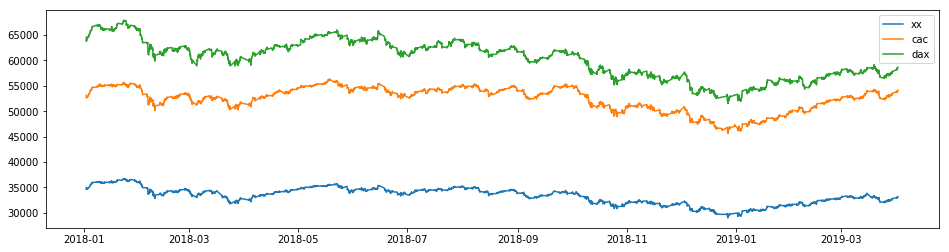

In [109]:
plt.figure(figsize=(16,4))

plt.plot(10*newxx_data['Close'][startDay:endDay],label='xx')
plt.plot(10*newcac_data['Close'][startDay:endDay],label='cac')
plt.plot(5*newdax_data['Close'][startDay:endDay],label='dax')
plt.legend(loc='upper right')

## 期貨對齊口數後畫線

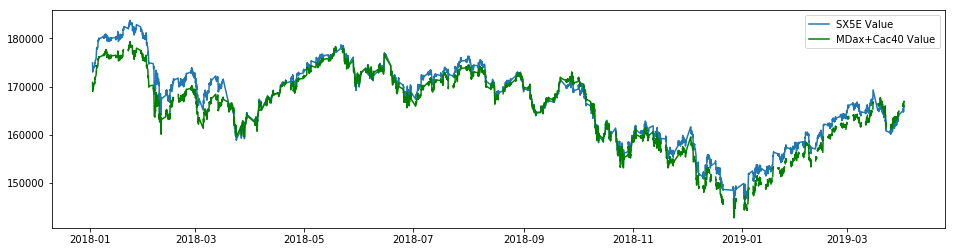

In [110]:
# 分割不同的時間段做不同的對齊口數
splitStartDay1='2016/1/1'
splitEndDay1='2016/4/30'
splitStartDay2='2016/5/1'
splitEndDay2='2017/11/30'
splitStartDay3='2017/12/1'
splitEndDay3='2019/4/2'

newxx_data.loc[splitStartDay1:splitEndDay1, 'SX5E_realSpread']=3*10*newxx_data.loc[splitStartDay1:splitEndDay1,'Close']
newxx_data.loc[splitStartDay1:splitEndDay1, 'DC_realSpread']=5*newdax_data.loc[splitStartDay1:splitEndDay1,'Close']+10*newcac_data.loc[splitStartDay1:splitEndDay1,'Close']

newxx_data.loc[splitStartDay2:splitEndDay3, 'SX5E_realSpread']=5*10*newxx_data.loc[splitStartDay2:splitEndDay2,'Close']
newxx_data.loc[splitStartDay2:splitEndDay3, 'DC_realSpread']=2*5*newdax_data.loc[splitStartDay2:splitEndDay2,'Close']+10*newcac_data.loc[splitStartDay2:splitEndDay2,'Close']

newxx_data.loc[splitStartDay3:splitEndDay3, 'SX5E_realSpread']=5*10*newxx_data.loc[splitStartDay3:splitEndDay3,'Close']
newxx_data.loc[splitStartDay3:splitEndDay3, 'DC_realSpread']=5*newdax_data.loc[splitStartDay3:splitEndDay3,'Close']+2*10*newcac_data.loc[splitStartDay3:splitEndDay3,'Close']

plt.figure(figsize=(16,4))
plt.plot(newxx_data['SX5E_realSpread'],label='SX5E Value')
plt.plot(newxx_data['DC_realSpread'],label='MDax+Cac40 Value',color='g')
plt.legend(loc='upper right') 

## 對齊口數後價值差圖

In [111]:
# 分割不同的時間段做不同的對齊口數
splitStartDay1='2016/1/1'
splitEndDay1='2016/4/30'
splitStartDay2='2016/5/1'
splitEndDay2='2017/11/30'
splitStartDay3='2017/12/1'
splitEndDay3='2019/4/2'

newxx_data.loc[splitStartDay1:splitEndDay1, 'realSpread']=3*10*newxx_data.loc[splitStartDay1:splitEndDay1,'Close']-5*newdax_data.loc[splitStartDay1:splitEndDay1,'Close']-10*newcac_data.loc[splitStartDay1:splitEndDay1,'Close']
newxx_data.loc[splitStartDay2:splitEndDay2, 'realSpread']=5*10*newxx_data.loc[splitStartDay2:splitEndDay2,'Close']-2*5*newdax_data.loc[splitStartDay2:splitEndDay2,'Close']-10*newcac_data.loc[splitStartDay2:splitEndDay2,'Close']
newxx_data.loc[splitStartDay3:splitEndDay3, 'realSpread']=5*10*newxx_data.loc[splitStartDay3:splitEndDay3,'Close']-5*newdax_data.loc[splitStartDay3:splitEndDay3,'Close']-2*10*newcac_data.loc[splitStartDay3:splitEndDay3,'Close']

newdax_data['realSpread']=newxx_data['realSpread']
newcac_data['realSpread']=newxx_data['realSpread']

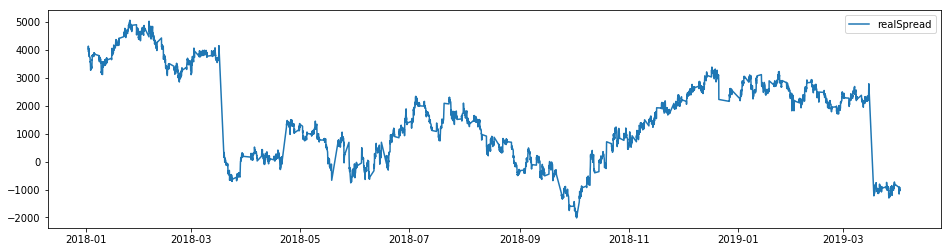

In [112]:
plt.figure(figsize=(16,4))

startDay='2016/1/1'
endDay='2019/4/1'

# 確認資料對齊
newxx_data=newxx_data.dropna()
newdax_data=newdax_data.dropna()
newcac_data=newcac_data.dropna()
plt.plot(newxx_data['realSpread'][startDay:endDay])
plt.legend(loc='upper right') 

# 各自商品的期貨減現貨

In [113]:
'''newxx_data['Spread']=((newxx_data['Close']-newxxn_data['Close'])/newxxn_data['Close'])
newcac_data['Spread']=(newcac_data['Close']-newcacn_data['Close'])/newcacn_data['Close']
newdax_data['Spread']=(newdax_data['Close']-newdaxn_data['Close'])/newdaxn_data['Close']'''
newxx_data['Spread']=newxx_data['Close']-newxxn_data['Close']
newcac_data['Spread']=newcac_data['Close']-newcacn_data['Close']
newdax_data['Spread']=newdax_data['Close']-newdaxn_data['Close']

##  基差圖
#### Euro Stoxx 50 Spread

Text(0.5,1,'SX5E Spread')

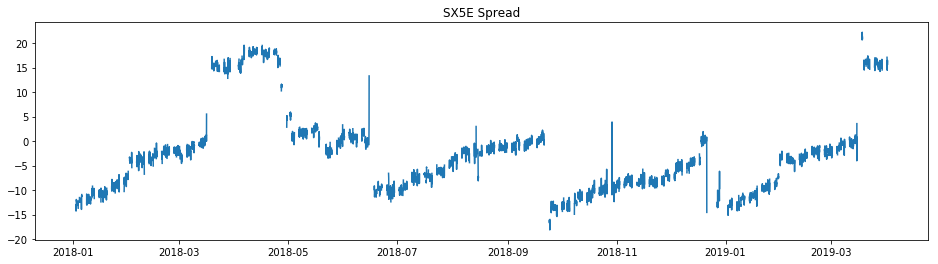

In [114]:
plt.figure(figsize=(16,4))
#plt.plot(newxx_data['Close']['2016/1/1':'2019/1/1'],label='Future',color='g')
#plt.plot(newxxn_data['Close']['2016/1/1':'2019/1/1'],label='Spot')
plt.plot(newxx_data['Spread'])
plt.title('SX5E Spread')

### Mini Dax Spread

Text(0.5,1,'Mini Dax')

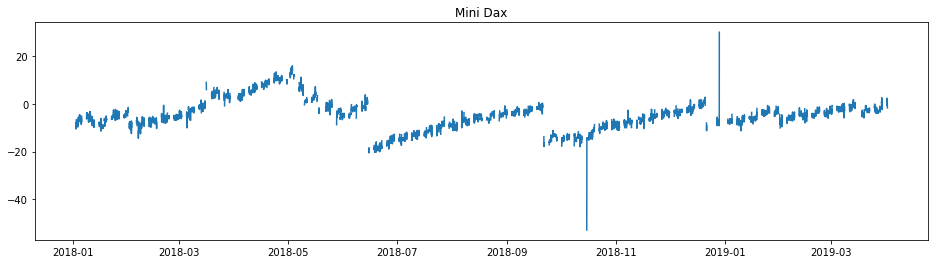

In [115]:
plt.figure(figsize=(16,4))
#plt.plot(newdax_data['Close'],label='Furue',color='g')
#plt.plot(newdaxn_data['Close'],label='Spot')
plt.plot(newdax_data['Spread'])
plt.title('Mini Dax')

### Cac Spread

Text(0.5,1,'Cac')

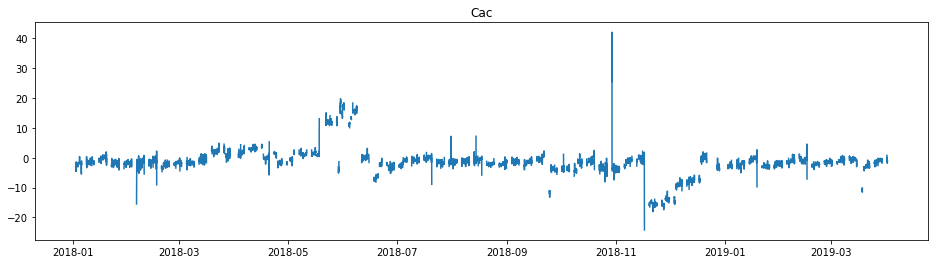

In [116]:
plt.figure(figsize=(16,4))
#plt.plot(newcac_data['Close']['2018/5/25':'2018/6/1'],label='Future')
#plt.plot(newcacn_data['Close']['2018/5/25':'2018/6/1'],label='Spot')
plt.plot(newcac_data['Spread'])
plt.title('Cac')

# 計算相對價差: SX5E價差-MDax價差-Cac40價差

In [117]:
# Euro Stoxx 50 的價差 減去 Mini Dax與Cac 40 價差的平均
newxx_data['relativeSpread']=(newxx_data['Spread']-(newdax_data['Spread']+newcac_data['Spread'])*0.5)
newdax_data['relativeSpread']=newxx_data['relativeSpread']
newcac_data['relativeSpread']=newxx_data['relativeSpread']

#把缺失的部分刪去
newxx_data=newxx_data.dropna()
newdax_data=newdax_data.dropna()
newcac_data=newcac_data.dropna()

# 長短線指標

In [118]:
#短時間價差變動率
nDay1=24
newxx_data['shortChangeRate']=(newxx_data['realSpread']-newxx_data['realSpread'].shift(nDay1))
#newxx_data.loc[lambda newxx_data: newxx_data.shortChangeRate > 1, lambda newxx_data: ['shortChangeRate']]=1
#newxx_data.loc[lambda newxx_data: newxx_data.shortChangeRate < -1, lambda newxx_data: ['shortChangeRate']]=-1
newdax_data['shortChangeRate']=newxx_data['shortChangeRate']
newcac_data['shortChangeRate']=newxx_data['shortChangeRate']



#長時間價差變動率
nDay2=40
newxx_data['longChangeRate']=(newxx_data['realSpread']-newxx_data['realSpread'].shift(nDay2))
#newxx_data.loc[lambda newxx_data: newxx_data.longChangeRate > 1, lambda newxx_data: ['longChangeRate']]=1
#newxx_data.loc[lambda newxx_data: newxx_data.longChangeRate < -1, lambda newxx_data: ['longChangeRate']]=-1
newdax_data['longChangeRate']=newxx_data['longChangeRate']
newcac_data['longChangeRate']=newxx_data['longChangeRate']


# 策略計算
## 相對價差布林通道&真實價值差波動度

In [119]:
# 統計區間
day=40

# 相對期現價差的平均 / 標準差 / 上下界
newxx_data['rollingMean']=newxx_data['relativeSpread'].rolling(window=day,min_periods=1).mean()
newxx_data['rollingStd']=newxx_data['relativeSpread'].rolling(window=day,min_periods=1).std()
newxx_data['upBound']=newxx_data['rollingMean']+3*newxx_data['rollingStd']
newxx_data['lowBound']=newxx_data['rollingMean']-2.5*newxx_data['rollingStd']

newdax_data['rollingMean']=newxx_data['rollingMean']
newcac_data['rollingMean']=newxx_data['rollingMean']


#真實價差的波動度
day=40
newxx_data['spreadStd']=newxx_data['realSpread'].rolling(window=day,min_periods=1).std()
newdax_data['spreadStd']=newxx_data['spreadStd']
newcac_data['spreadStd']=newxx_data['spreadStd']
#1個標準差
newxx_data['up1Spread']=newxx_data['spreadStd']
newxx_data['low1Spread']=-newxx_data['spreadStd']
#2個標準差
newxx_data['up2Spread']=newxx_data['spreadStd']*2
newxx_data['low2Spread']=-newxx_data['spreadStd']*2


## 圖

65


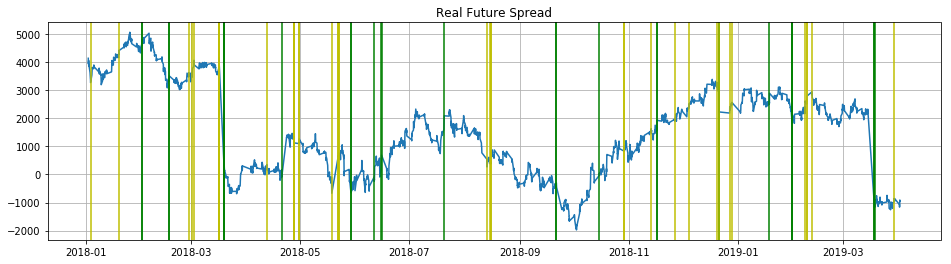

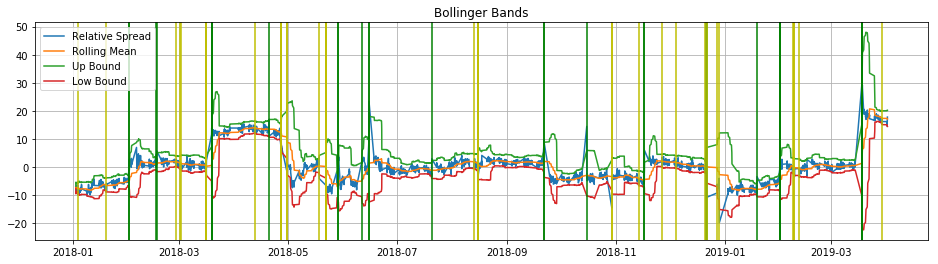

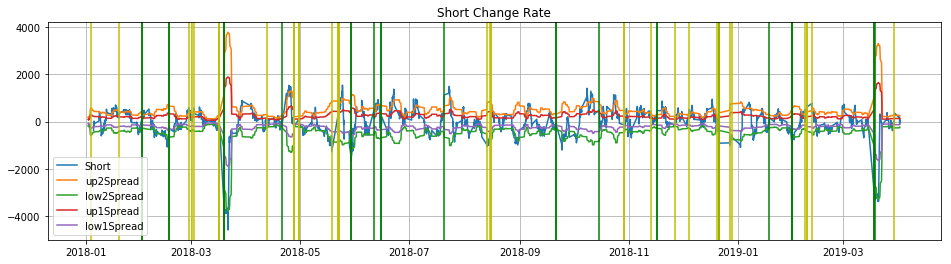

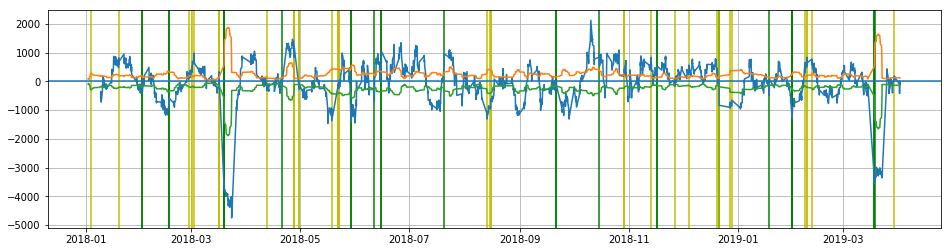

In [120]:
testStartDay='2016/1/1'
testEndDay='2019/4/1'

#highlight是相對價差超過上邊界發生的時間  / highlight2是相對價差跌破下邊界發生的時間
highlight=[]
highlight=newxx_data[newxx_data['relativeSpread']>newxx_data['upBound']].index
highlight=highlight[highlight>testStartDay ]
highlight=highlight[ highlight<testEndDay]
highlight2=[]
highlight2=newxx_data[newxx_data['relativeSpread']<newxx_data['lowBound']].index
highlight2=highlight2[highlight2>testStartDay ]
highlight2=highlight2[ highlight2<testEndDay]

def signalDetect():
    if len(highlight)!=0:
        for i in range(0,len(highlight)):
            plt.axvline(highlight[i],color='g')
    else:
        a=0
    if len(highlight2)!=0:
        for i in range(0,len(highlight2)):
            plt.axvline(highlight2[i],color='y')  
    else:
        a=0

# Real Future Spread 
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(newxx_data['realSpread'][testStartDay:testEndDay])
plt.title('Real Future Spread')
signalDetect()

    
# Bollinger Bands
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(newxx_data['relativeSpread'][testStartDay:testEndDay],label='Relative Spread')
plt.plot(newxx_data['rollingMean'][testStartDay:testEndDay],label='Rolling Mean')
plt.plot(newxx_data['upBound'][testStartDay:testEndDay],label='Up Bound')
plt.plot(newxx_data['lowBound'][testStartDay:testEndDay],label='Low Bound')
plt.legend(loc='best')
plt.title('Bollinger Bands')
signalDetect()  


#短期報酬率  
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(newxx_data['shortChangeRate'][testStartDay:testEndDay],label='Short')
plt.title('Short Change Rate')
#真實價差的報酬率  
plt.plot(newxx_data['up2Spread'][testStartDay:testEndDay])
plt.plot(newxx_data['low2Spread'][testStartDay:testEndDay])
plt.plot(newxx_data['up1Spread'][testStartDay:testEndDay])
plt.plot(newxx_data['low1Spread'][testStartDay:testEndDay])
plt.legend(loc='best')
signalDetect()


#長期報酬率
plt.figure(figsize=(16,4))
signalDetect()
plt.grid(True)
plt.plot(newxx_data['longChangeRate'][testStartDay:testEndDay],label='Long')
plt.axhline(0)
plt.plot(newxx_data['up1Spread'][testStartDay:testEndDay])
plt.plot(newxx_data['low1Spread'][testStartDay:testEndDay])


#印出發生訊號次數
print(len(highlight)+len(highlight2))

# 回測

In [121]:
#多方訊號
# biasSpread 判斷 RelativeSpread是否在 UpBound之上 是的話回傳1 不是回傳-1
newxx_data['biasSpread']=newxx_data.apply(lambda x:1 if (x['relativeSpread']>=x['upBound']  )  else -1,axis=1)
e=newxx_data['biasSpread']-newxx_data['biasSpread'].shift(1)  
enonan = np.where(np.isnan(e),0,e)
# biasSignal 判斷 RelativeSpread 跨越 UpBound的那一刻 
newxx_data['biasSignal']=enonan
newxx_data['biasSignal']=(enonan/2)  
newxx_data['biasSignal']=newxx_data['biasSignal'].replace(to_replace=-1, value=0)
#將biasSignal往後移五天(40個小時)，方便對齊"進場後的"報酬率
newxx_data['biasSignal']=newxx_data['biasSignal'].shift(40)
#讓各資料時間對準
newdax_data['biasSignal']=newxx_data['biasSignal']
newcac_data['biasSignal']=newxx_data['biasSignal']


#計算訊號發生後報酬率 
newxx_data['biasReturnRate']=newxx_data['biasSignal']*newxx_data['longChangeRate']


#空方進場
# biasSpread2 判斷 RelativeSpread是否在 lowBound之下是的話回傳-1 不是回傳1
newxx_data['biasSpread2']=newxx_data.apply(lambda x:1 if (x['relativeSpread']<=x['lowBound']  )  else -1,axis=1)
e=newxx_data['biasSpread2']-newxx_data['biasSpread2'].shift(1)  
enonan = np.where(np.isnan(e),0,e)
# biasSignal2 判斷 RelativeSpread 跨越 lowBound的那一刻 
newxx_data['biasSignal2']=enonan
newxx_data['biasSignal2']=(enonan/2)  
newxx_data['biasSignal2']=newxx_data['biasSignal2'].replace(to_replace=-1, value=0)
#將biasSignal2往後移5天(40個小時)，方便對齊"進場後的"報酬率
newxx_data['biasSignal2']=newxx_data['biasSignal2'].shift(40)
#讓各資料時間對準
newdax_data['biasSignal2']=newxx_data['biasSignal2']
newcac_data['biasSignal2']=newxx_data['biasSignal2']


#計算訊號發生後報酬率 
newxx_data['biasReturnRate2']=newxx_data['biasSignal2']*newxx_data['longChangeRate']




#多方訊號
newxx_data['longSignal']=newxx_data.apply(lambda x:1 if x['biasSignal']==1  else 0,axis=1)
#讓各資料時間對準
newdax_data['longSignal']=newxx_data['longSignal']
newcac_data['longSignal']=newxx_data['longSignal']

#空方訊號
newxx_data['shortSignal']=newxx_data.apply(lambda x:-1 if x['biasSignal2']==1  else 0,axis=1)
#讓各資料時間對準
newdax_data['shortSignal']=newxx_data['shortSignal']
newcac_data['shortSignal']=newxx_data['shortSignal']

newxx_data=newxx_data.dropna()
newdax_data=newdax_data.dropna()
newcac_data=newcac_data.dropna()


'''# shortCrossOver 判斷 RelativeSpread是否在 lowBound之下 是的話回傳1 不是回傳-1
newxx_data['shortCrossOver']=newxx_data.apply(lambda x:-1 if (x['relativeSpread']>x['upBound'] or x['relativeSpread']<x['lowBound'] ) and x['shortChangeRate'] <0 else 1,axis=1)
newxx_data=newxx_data.dropna()
e=newxx_data['shortCrossOver']-newxx_data['shortCrossOver'].shift(1)
enonan = np.where(np.isnan(e),0,e)
# shortSignal 判斷 RelativeSpread 跨越 lowBound的那一刻 
newxx_data['shortSignal']=enonan
newxx_data['shortSignal']=(enonan/2)  
newxx_data['shortSignal']=newxx_data['shortSignal'].replace(to_replace=1, value=0)
#longExitSignal 做為多方出場依據(或許可以直接用空方進場訊號代替)
#newxx_data['longExitSignal']=newxx_data['shortSignal']

newxx_data=newxx_data.dropna()
newdax_data=newdax_data.dropna()
newcac_data=newcac_data.dropna()

newxx_data['longcoverCrossOver']=newxx_data.apply(lambda x:-1 if x['longChangeRate']<-0.05 else 1,axis=1)
newxx_data=newxx_data.dropna()
e=newxx_data['longcoverCrossOver']-newxx_data['longcoverCrossOver'].shift(1)
enonan = np.where(np.isnan(e),0,e)
newxx_data['longExitSignal']=enonan
newxx_data['longExitSignal']=(enonan/2)
newxx_data['longExitSignal']=newxx_data['longExitSignal'].replace(to_replace=1, value=0)

newxx_data['shortcoverCrossOver']=newxx_data.apply(lambda x:1 if x['longChangeRate']>0.05 else -1,axis=1)
newxx_data=newxx_data.dropna()
e=newxx_data['shortcoverCrossOver']-newxx_data['shortcoverCrossOver'].shift(1)
enonan = np.where(np.isnan(e),0,e)
newxx_data['shortExitSignal']=enonan
newxx_data['shortExitSignal']=(enonan/2)
newxx_data['shortExitSignal']=newxx_data['shortExitSignal'].replace(to_replace=-1, value=0)'''

"# shortCrossOver 判斷 RelativeSpread是否在 lowBound之下 是的話回傳1 不是回傳-1\nnewxx_data['shortCrossOver']=newxx_data.apply(lambda x:-1 if (x['relativeSpread']>x['upBound'] or x['relativeSpread']<x['lowBound'] ) and x['shortChangeRate'] <0 else 1,axis=1)\nnewxx_data=newxx_data.dropna()\ne=newxx_data['shortCrossOver']-newxx_data['shortCrossOver'].shift(1)\nenonan = np.where(np.isnan(e),0,e)\n# shortSignal 判斷 RelativeSpread 跨越 lowBound的那一刻 \nnewxx_data['shortSignal']=enonan\nnewxx_data['shortSignal']=(enonan/2)  \nnewxx_data['shortSignal']=newxx_data['shortSignal'].replace(to_replace=1, value=0)\n#longExitSignal 做為多方出場依據(或許可以直接用空方進場訊號代替)\n#newxx_data['longExitSignal']=newxx_data['shortSignal']\n\nnewxx_data=newxx_data.dropna()\nnewdax_data=newdax_data.dropna()\nnewcac_data=newcac_data.dropna()\n\nnewxx_data['longcoverCrossOver']=newxx_data.apply(lambda x:-1 if x['longChangeRate']<-0.05 else 1,axis=1)\nnewxx_data=newxx_data.dropna()\ne=newxx_data['longcoverCrossOver']-newxx_data['longcoverCrossOver'].

In [122]:
# 將Index換成數字 方便圖呈現
newxx_data=newxx_data.reset_index()
newdax_data=newdax_data.reset_index()
newcac_data=newcac_data.reset_index()

In [123]:
# 交易次數初始化
transactionNum=0
#持有狀況初始化，並令第一筆不持有
newxx_data['position']=3
newxx_data['position'][0]=0
#手續費初始化
newxx_data['transactionFee']=0
detail_Date=[]
detail_Num=[]
detail_Spread=[]
detail_Position=[]

#進場價
entryPrice=0

#進場後累積損益初始化
entryPL=0

#出場機制計算天數
entryday=0

for i in range(1,len(newdax_data['shortSignal'])):

    #結算日出場
    if (i==431 or i==630 or  i==2406 or(i>=447 and i<=476))  and newxx_data['position'][i-1]!=0:
            entryPL=0
            entryPrice=0
            entryday=0
            newxx_data['position'][i]=0
            detail_Num.append(newxx_data.index[i])
            detail_Date.append(newxx_data['Date'][i])
            detail_Spread.append(newxx_data['realSpread'][i])
            detail_Position.append(newxx_data['position'][i])
            print(str(newxx_data.index[i])+': ',newxx_data['Date'][i],newxx_data['realSpread'][i],newxx_data['longSignal'][i],newxx_data['shortSignal'][i],newxx_data['position'][i])
            
    # 前一根沒有持有部位，這一根有有多空訊號 進場
    elif newxx_data['position'][i-1]==0 and (newxx_data['longSignal'][i] or newxx_data['shortSignal'][i]!=0):
            newxx_data['position'][i]=newxx_data['longSignal'][i] + newxx_data['shortSignal'][i]
            #標記手續費發生
            newxx_data['transactionFee'][i]=1 
            #紀錄交易明細
            entryPrice=newxx_data['realSpread'][i]
            enrtyday=1
            detail_Num.append(newxx_data.index[i])
            detail_Date.append(newxx_data['Date'][i])
            detail_Spread.append(newxx_data['realSpread'][i])
            detail_Position.append(newxx_data['position'][i])
            print(str(newxx_data.index[i])+': ',newxx_data['Date'][i],newxx_data['realSpread'][i],newxx_data['longSignal'][i],newxx_data['shortSignal'][i],newxx_data['position'][i])
            #紀錄交易次數
            transactionNum+=1       
    
    # 前一根持有多頭部位，這一根有出場訊號  出場   or entryPL<=-1000 
    elif newxx_data['position'][i-1]==1 and (newxx_data['shortSignal'][i+1]!=0 or (entryPL<=-1000 and entryday>80 and newxx_data['shortChangeRate'][i-1]<=newxx_data['low1Spread'][i-1])):
            entryPL=0
            entryPrice=0
            entryday=0
            newxx_data['position'][i]=0
            #紀錄交易明細
            detail_Num.append(newxx_data.index[i])
            detail_Date.append(newxx_data['Date'][i])
            detail_Spread.append(newxx_data['realSpread'][i])
            detail_Position.append(newxx_data['position'][i])
            print(str(newxx_data.index[i])+': ',newxx_data['Date'][i],newxx_data['realSpread'][i],newxx_data['longSignal'][i],newxx_data['shortSignal'][i],newxx_data['position'][i])
    
    # 前一根持有空頭部位，這一根有出場訊號  出場 or entryPL<=-1000 
    elif newxx_data['position'][i-1]==-1 and ( newxx_data['longSignal'][i+1]!=0 or (entryPL<=-1000 and entryday>80 and newxx_data['shortChangeRate'][i-1]>=newxx_data['up1Spread'][i-1])):
            entryPL=0
            entryPrice=0
            entryday=0
            newxx_data['position'][i]=0  
            #紀錄交易明細
            detail_Num.append(newxx_data.index[i])
            detail_Date.append(newxx_data['Date'][i])
            detail_Spread.append(newxx_data['realSpread'][i])
            detail_Position.append(newxx_data['position'][i])
            print(str(newxx_data.index[i])+': ',newxx_data['Date'][i],newxx_data['realSpread'][i],newxx_data['longSignal'][i],newxx_data['shortSignal'][i],newxx_data['position'][i])
    
    # 前一根有持有部位這一根沒有要出場，則維持部位且紀錄進場後損益
    elif newxx_data['position'][i-1]!=0:
            newxx_data['position'][i]=newxx_data['position'][i-1]
            entryPL=newxx_data['position'][i]*(newxx_data['realSpread'][i]-entryPrice)
            entryday+=1
    
    # 前一根沒有持有部位 這一根也沒有持有部位  繼續維持沒有持有部位
    else:
            newxx_data['position'][i]=newxx_data['position'][i-1]
            

print(transactionNum)



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

15:  2018-01-10 16:00:00 3425.0 0 -1 -1


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


97:  2018-01-25 11:00:00 5007.5 0 0 0
105:  2018-01-26 11:00:00 4817.5 0 -1 -1
174:  2018-02-08 09:00:00 4345.0 0 0 0
175:  2018-02-08 10:00:00 4357.5 1 0 1


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


257:  2018-02-22 12:00:00 3140.0 0 0 0
264:  2018-02-23 11:00:00 3067.5 1 0 1
324:  2018-03-06 15:00:00 3852.5 0 0 0
325:  2018-03-06 16:00:00 3870.0 0 -1 -1
425:  2018-03-23 16:00:00 -605.0 0 0 0
426:  2018-03-26 09:00:00 -600.0 1 0 1


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


431:  2018-03-26 14:00:00 -510.0 0 0 0
559:  2018-04-19 14:00:00 10.0 0 -1 -1
607:  2018-04-27 14:00:00 1190.0 0 0 0
608:  2018-04-27 15:00:00 1015.0 1 0 1
630:  2018-05-03 13:00:00 800.0 0 0 0
642:  2018-05-07 09:00:00 1015.0 0 -1 -1
801:  2018-06-04 16:00:00 175.0 0 0 0
802:  2018-06-05 09:00:00 90.0 1 0 1
1231:  2018-08-20 12:00:00 542.5 0 0 0
1232:  2018-08-20 13:00:00 465.0 0 -1 -1
1459:  2018-09-28 12:00:00 -1482.5 0 0 0
1460:  2018-09-28 13:00:00 -1607.5 1 0 1
1655:  2018-11-05 09:00:00 930.0 0 0 0
1656:  2018-11-05 10:00:00 845.0 0 -1 -1
1738:  2018-11-19 12:00:00 1930.0 0 0 0
1744:  2018-11-20 10:00:00 2022.5 0 -1 -1
1772:  2018-11-23 14:00:00 1802.5 0 0 0
1773:  2018-11-23 15:00:00 1850.0 1 0 1
1818:  2018-12-03 12:00:00 2285.0 0 0 0
1819:  2018-12-03 13:00:00 2360.0 0 -1 -1
1902:  2018-12-17 16:00:00 3315.0 0 0 0
1961:  2019-01-04 09:00:00 2850.0 0 -1 -1
1966:  2019-01-04 14:00:00 2992.5 0 0 0
1967:  2019-01-04 15:00:00 3055.0 1 0 1
1969:  2019-01-07 09:00:00 3035.0 0 0 0
19

# 進出場點位

Text(0.5,1,'shortChangeRate')

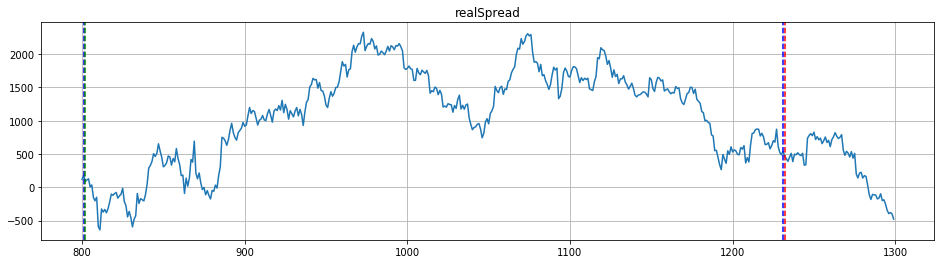

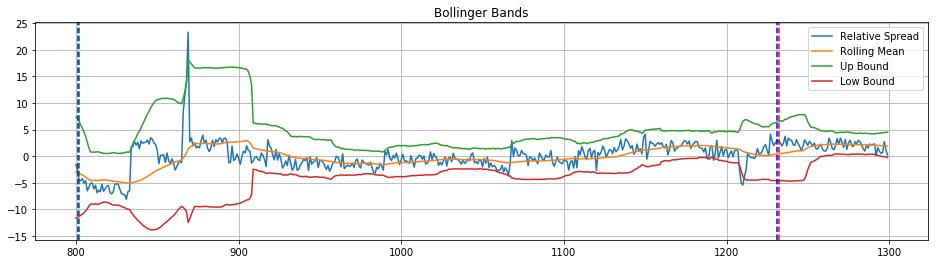

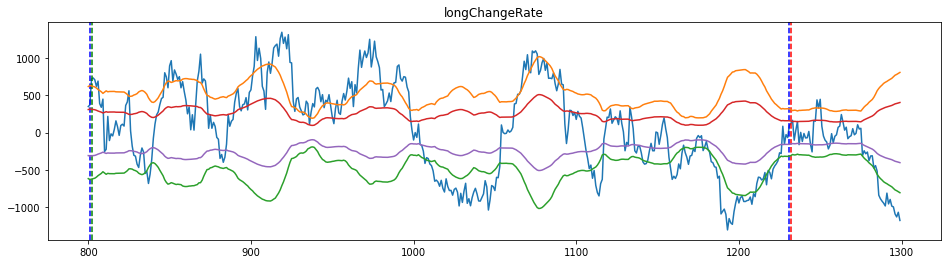

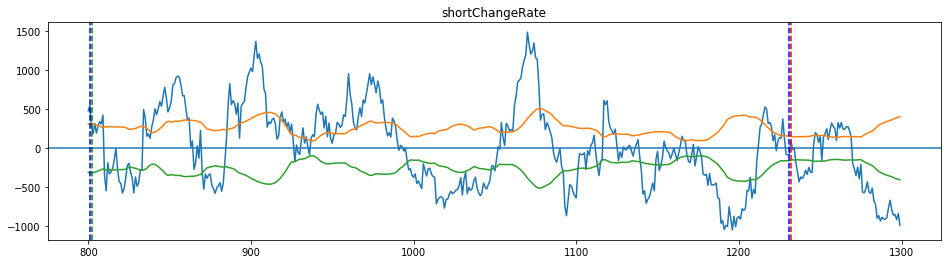

In [124]:
#綠色直線為多單進場點
#紅色直線為空單進場點
#藍色直線為出場點
def orderPosition():
    for i in detail_Num:
        if i > startDay and i < endDay and detail_Num.index(i)%2==0 and detail_Position[detail_Num.index(i)]==1:
            plt.axvline(i, linestyle= '--',color='g')
            a=0
        elif i > startDay and i < endDay and detail_Num.index(i)%2==0 and detail_Position[detail_Num.index(i)]==-1:
            plt.axvline(i, linestyle= '--',color='r')
            a=0
        elif i > startDay and i < endDay and detail_Num.index(i)%2!=0:
            plt.axvline(i, linestyle= '--',color='b')
        else:
            a=1

startDay=800
endDay=1300


#真實價值圖
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(newxx_data['realSpread'][startDay:endDay])
orderPosition()
plt.title('realSpread')


#相對價差圖
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(newxx_data['relativeSpread'][startDay:endDay],label='Relative Spread')
plt.plot(newxx_data['rollingMean'][startDay:endDay],label='Rolling Mean')
plt.plot(newxx_data['upBound'][startDay:endDay],label='Up Bound')
plt.plot(newxx_data['lowBound'][startDay:endDay],label='Low Bound')
plt.legend(loc='best')
plt.title('Bollinger Bands')
orderPosition()


#長期報酬率圖
plt.figure(figsize=(16,4))
plt.plot(newxx_data['longChangeRate'][startDay:endDay])
orderPosition()
plt.plot(newxx_data['up2Spread'][startDay:endDay])
plt.plot(newxx_data['low2Spread'][startDay:endDay])
plt.plot(newxx_data['up1Spread'][startDay:endDay])
plt.plot(newxx_data['low1Spread'][startDay:endDay])
plt.title('longChangeRate')


#短期報酬率
plt.figure(figsize=(16,4))
plt.plot(newxx_data['shortChangeRate'][startDay:endDay])
plt.axhline(0)
plt.plot(newxx_data['up1Spread'][startDay:endDay])
plt.plot(newxx_data['low1Spread'][startDay:endDay])
orderPosition()
plt.title('shortChangeRate')

# 交易明細(點位&時間)

In [125]:
tradeDetail=[]
tradeDetail=pd.DataFrame(tradeDetail)
tradeDetail['detail_Num']=detail_Num
tradeDetail['Date']=detail_Date
tradeDetail['realSpread']=detail_Spread
tradeDetail['Position']=detail_Position
tradeDetail['tradingtime']=0
tradeDetail['idletime']=0

# 初始化tradingtime(持有時間)/idletime(閒置時間)
tradingtime=tradeDetail['Date'][1]-tradeDetail['Date'][1]
idletime=tradeDetail['Date'][1]-tradeDetail['Date'][1]

#初始化maxtradingtime(最大持有時間)
maxtradingtime=tradeDetail['Date'][1]-tradeDetail['Date'][1]


#計算交易時間/最大交易時間/空閒時間
for i in range(1,len(tradeDetail['Position'])):
    if tradeDetail['Position'][i]== 0:
        tradeDetail['tradingtime'][i]=tradeDetail['Date'][i]-tradeDetail['Date'][i-1]
        tradingtime+=tradeDetail['tradingtime'][i]
        if tradeDetail['tradingtime'][i]>maxtradingtime:
            maxtradingtime=tradeDetail['tradingtime'][i]
    else:
        
        tradeDetail['idletime'][i]=tradeDetail['Date'][i]-tradeDetail['Date'][i-1]
        idletime+=tradeDetail['idletime'][i]

#計算單筆損益        
tradeDetail['P&L']=0
for i in range(1,len(tradeDetail['P&L'])):
    if tradeDetail['Position'][i]== 0:
        tradeDetail['P&L'][i]=tradeDetail['Position'][i-1]*(tradeDetail['realSpread'][i]-tradeDetail['realSpread'][i-1])-(5*10*3+1*5*3+2*10*3)
    else:
        tradeDetail['P&L'][i]=0

#加總單筆損益
tradeDetail['Total P&L']=tradeDetail['P&L'].cumsum()

print("transaction times:",transactionNum)
print('tradingtime:',tradingtime/((len(tradeDetail['Position'])-1)/2))
print('maxtradingtime',maxtradingtime)
print('idletime:',idletime/((len(tradeDetail['Position'])-2)/2+1))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

transaction times: 22
tradingtime: 17 days 20:30:41.860465
maxtradingtime 76 days 03:00:00
idletime: 2 days 12:02:43.636363


In [126]:
tradeDetail

,detail_Num,Date,realSpread,Position,tradingtime,idletime,P&L,Total P&L
0,15,2018-01-10 16:00:00,3425.0,-1,0,0,0,0
1,97,2018-01-25 11:00:00,5007.5,0,14 days 19:00:00,0,-1807,-1807
2,105,2018-01-26 11:00:00,4817.5,-1,0,1 days 00:00:00,0,-1807
3,174,2018-02-08 09:00:00,4345.0,0,12 days 22:00:00,0,247,-1560
4,175,2018-02-08 10:00:00,4357.5,1,0,0 days 01:00:00,0,-1560
5,257,2018-02-22 12:00:00,3140.0,0,14 days 02:00:00,0,-1442,-3002
6,264,2018-02-23 11:00:00,3067.5,1,0,0 days 23:00:00,0,-3002
7,324,2018-03-06 15:00:00,3852.5,0,11 days 04:00:00,0,560,-2442
8,325,2018-03-06 16:00:00,3870.0,-1,0,0 days 01:00:00,0,-2442
9,425,2018-03-23 16:00:00,-605.0,0,17 days 00:00:00,0,4250,1808


# 平倉及未平倉損益圖

Text(0.5,1,'Settled Daily P&L')

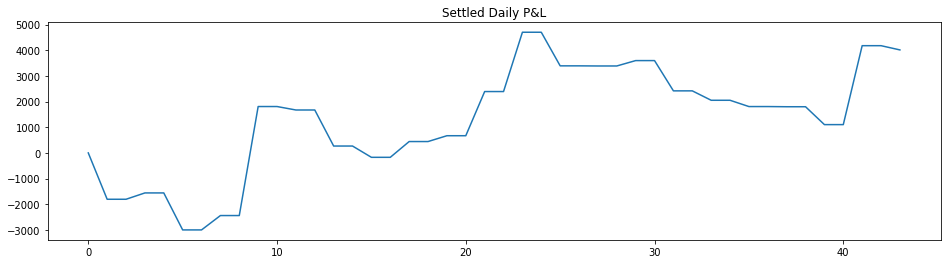

In [127]:
startDay=0
endDay=150

plt.figure(figsize=(16,4))
plt.plot(tradeDetail['Total P&L'][startDay:endDay])
plt.title('Settled Daily P&L')